### Look at periportal and pericentral hepatocyte/endothelial cell spatial statistics

In [1]:
import os
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import anndata as ad
import scanpy as sc
import squidpy as sq
import string

mpl.rcParams.update(mpl.rcParamsDefault) #Reset rcParams to default
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']  # Colors in this style

# Plotting style function (run this before plotting the final figure)
def set_plotting_style():
    plt.style.use('seaborn-paper')
    plt.rc('axes', labelsize=12)
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.rc('legend', fontsize=10)
    plt.rc('text.latex', preamble=r'\usepackage{sfmath}')
    plt.rc('xtick.major', pad=2)
    plt.rc('ytick.major', pad=2)
    plt.rc('mathtext', fontset='stixsans', sf='sansserif')
    plt.rc('figure', figsize=[10,9])
    plt.rc('svg', fonttype='none')
    
# Function to preprocess raw AnnData object

def preprocess_ad(ad, min_counts):
    ad.layers['counts'] = ad.X.copy()
    sc.pp.filter_cells(ad, min_counts=min_counts)
    sc.pp.normalize_total(ad, target_sum=1e4) # Normalize data
    sc.pp.log1p(ad) # Logarithmize the data
    sc.pp.scale(ad) # Scale each gene to unit variance

In [2]:
# Load data
fileDir = '/mnt/ibm_lg/spatial-seq/vizgen-MACA-comparison-paper/results/'

VizgenLiver = ad.read_h5ad(fileDir + 'MERFISH_liver_object.h5ad')

# Rotate coordinates for liver to make the aspect ratio nicer
VizgenLiver.obsm['spatial'] = VizgenLiver.obsm['spatial'][:,[1,0]].copy()

# Create abbreviated cell type labels
liver_abbrev_map = {'immune cell': 'IC',
                   'other endothelial cell': 'o-EC',
                   'Kupffer cell': 'KC',
                   'hepatic stellate cell': 'HSC',
                   'other hepatocyte': 'o-hep',
                   'periportal hepatocyte': 'PP-hep',
                   'pericentral hepatocyte': 'PC-hep',
                   'periportal endothelial cell': 'PP-EC',
                   'pericentral endothelial cell': 'PC-EC'}

VizgenLiver.obs['free_annotation_abv'] = VizgenLiver.obs['free_annotation'].map(liver_abbrev_map)
VizgenLiver.obs['free_annotation_abv'] = VizgenLiver.obs['free_annotation_abv'].astype('category')

print('Results loaded.')

Results loaded.


/data01/jonathan.liu/miniconda3/envs/jupyter/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


<Figure size 432x288 with 0 Axes>

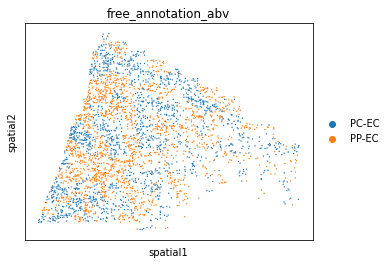

/data01/jonathan.liu/miniconda3/envs/jupyter/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


<Figure size 432x288 with 0 Axes>

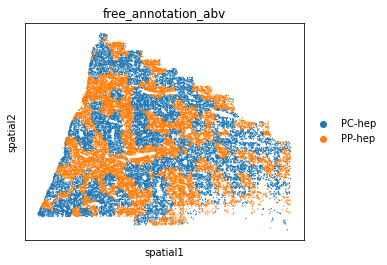

In [3]:
# Spatial plot of hepatocytes and endothelial cells
plt.figure()
sc.pl.spatial(VizgenLiver[
    VizgenLiver.obs['free_annotation_abv'].isin(['PP-EC',
                                                'PC-EC'])], color='free_annotation_abv', spot_size=30)
plt.show()

plt.figure()
sc.pl.spatial(VizgenLiver[
    VizgenLiver.obs['free_annotation_abv'].isin(['PP-hep',
                                                'PC-hep'])], color='free_annotation_abv', spot_size=30)
plt.show()

In [5]:
# Get just the hepatocytes and endothelial cells
VizgenSubset = VizgenLiver[VizgenLiver.obs['free_annotation_abv'].isin(['PP-EC',
                                                                        'PC-EC',
                                                                        'PP-hep',
                                                                        'PC-hep'])].copy()

# Calculate squidpy co-occurrence
#intervals = np.arange(20,500,20)
sq.gr.co_occurrence(VizgenSubset, 
                    cluster_key='free_annotation_abv',
                    n_splits=0,
                    n_jobs=100)

print('Co-occurrence probabilities computed.')

  0%|          | 0/1 [00:00<?, ?/s]

Co-occurrence probabilities computed.


In [6]:
VizgenSubset.uns['free_annotation_abv_co_occurrence']['occ']

array([[[2.0702598 , 1.6728127 , 1.3659922 , 1.15147   , 1.0399338 ,
         1.0262669 , 1.0454385 , 1.0740429 , 1.0994987 , 1.085863  ,
         1.0674337 , 1.0319895 , 0.99016917, 0.9578586 , 0.9344047 ,
         0.9217635 , 0.9338747 , 0.94462866, 0.9829887 , 1.0305794 ,
         1.0704331 , 1.080399  , 1.0852444 , 1.0956967 , 1.0866032 ,
         1.0737048 , 1.0688033 , 1.0647434 , 1.0595151 , 1.0558846 ,
         1.0380279 , 1.0344613 , 1.0126808 , 0.9691287 , 0.9541832 ,
         0.9468885 , 0.9289959 , 0.89786685, 0.87083817, 0.8834692 ,
         0.893723  , 0.91805154, 0.925043  , 0.9098618 , 0.926128  ,
         0.94928   , 0.951663  , 0.972264  , 0.9762219 ],
        [1.7379059 , 1.4516928 , 1.209453  , 1.0563354 , 0.9727717 ,
         0.95832986, 0.9734906 , 0.99467325, 1.003813  , 1.0037798 ,
         0.99038357, 0.9617693 , 0.9403682 , 0.92475384, 0.9174947 ,
         0.9170902 , 0.9200739 , 0.932295  , 0.9592314 , 0.98607594,
         1.0042799 , 1.02072   , 1.0290018 , 

In [7]:
VizgenSubset.uns['free_annotation_abv_co_occurrence']['interval']

array([  52.56768 ,  114.888336,  177.20898 ,  239.52965 ,  301.8503  ,
        364.17096 ,  426.4916  ,  488.81226 ,  551.13293 ,  613.45355 ,
        675.77423 ,  738.0949  ,  800.4155  ,  862.7362  ,  925.0568  ,
        987.3775  , 1049.6981  , 1112.0188  , 1174.3395  , 1236.6602  ,
       1298.9808  , 1361.3014  , 1423.6221  , 1485.9427  , 1548.2634  ,
       1610.5841  , 1672.9047  , 1735.2253  , 1797.546   , 1859.8667  ,
       1922.1874  , 1984.5079  , 2046.8286  , 2109.1494  , 2171.47    ,
       2233.7905  , 2296.1113  , 2358.432   , 2420.7527  , 2483.0732  ,
       2545.3938  , 2607.7146  , 2670.0352  , 2732.356   , 2794.6765  ,
       2856.997   , 2919.3179  , 2981.6384  , 3043.9592  , 3106.2798  ],
      dtype=float32)

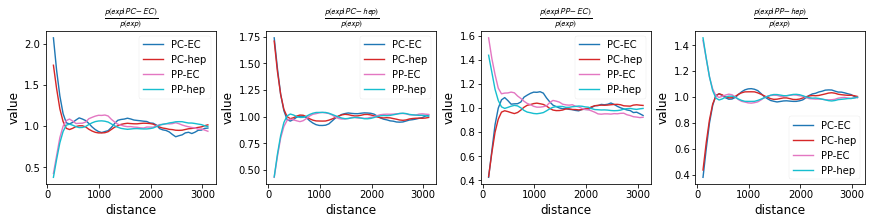

In [8]:
# Plot co-occurrence
set_plotting_style()

sq.pl.co_occurrence(VizgenSubset, cluster_key="free_annotation_abv", figsize=(12,3),
                   palette='tab10',legend_kwargs={'loc':'best'})

plt.show()

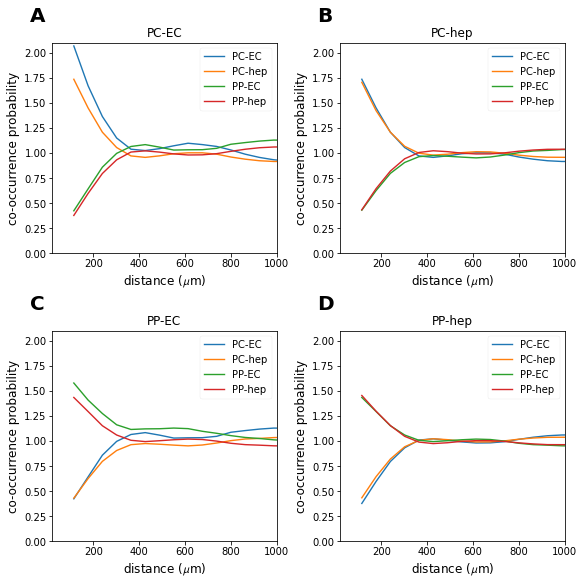

In [11]:
# Plot co-occurrence
set_plotting_style()
clusters = ['PC-EC','PC-hep','PP-EC','PP-hep']
occ = VizgenSubset.uns['free_annotation_abv_co_occurrence']['occ']
dist = VizgenSubset.uns['free_annotation_abv_co_occurrence']['interval'][1:]

fig, axes = plt.subplots(2,2,figsize=(8,8), constrained_layout=True)
for i, ax in zip(range(len(clusters)), axes.flatten()):
    for j in range(len(clusters)):
        ax.plot(dist,occ[i,j,:],label=clusters[j])
    ax.set_xlim(20,1000)
    ax.set_ylim(0,2.1)
    ax.set_xlabel('distance ($\mu$m)')
    ax.set_ylabel('co-occurrence probability')
    ax.set_title(clusters[i])
    ax.legend()
    
# Label subpanels
axes_label = [axes[0,0], axes[0,1], axes[1,0], axes[1,1]]
for n, ax in enumerate(axes_label):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
                size=20, weight='bold')

plt.show()

In [12]:
# Save the figure
fig.savefig('../../figures/SIFig_liver_cooccurrence.svg', transparent=True)
fig.savefig('../../figures/SIFig_liver_cooccurrence.png', transparent=True)

print('Figures saved.')

Figures saved.
